<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Python para Ciencia de Datos </h2>
    <h2> Guía de Trucos para Pandas</h2>
</div>

<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Datos ordenados - Una base para el procesamiento en pandas</h2>
</div>

### Los datos ordenados complementan las operaciones vectorizadas de pandas. pandas preservará automáticamente las observaciones mientras manipulas las variables. Ningún otro formato funciona de manera tan intuitiva como pandas.

#### Cada **variable** se guarda en su propia columna y cada **observción** se guarda en su propia fila

![Orden de datos en Pandas](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Creación de Data Frames</h2>
</div>

In [1]:
import pandas as pd 

df1 = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index = [1, 2, 3])
print(df1) #Especifica valores para cada columna 

df2 = pd.DataFrame(
    [[4, 7, 10],
    [5, 8, 11],
    [6, 9, 12]],
    index=[1, 2, 3],
    columns=['a', 'b', 'c']) 
print(df2) #Especifica valores para cada fila

df3 = pd.DataFrame(

    {"a" : [4 ,5, 6],
    "b" : [7, 8, 9],
    "c" : [10, 11, 12]},
    index = pd.MultiIndex.from_tuples(
    [('d', 1), ('d', 2),
    ('e', 2)], names=['n', 'v'])) 
print(df3) #Crea un Dataframe con multi-índice 

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
     a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12


<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Creación de Data Frames</h2>
</div>

### La mayoría de los métodos de pandas devuelven un DataFrame para que otro método de pandas pueda aplicarse al resultado. Esto mejora la legibilidad del código.

In [3]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index = [1, 2, 3])
df1 = (pd.melt(df)
    .rename(columns={
    'variable':'var',
    'value':'val'})
    .query('val >= 200')
)
print(df1)

Empty DataFrame
Columns: [var, val]
Index: []


<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Reformar datos</h2>
</div>

In [5]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index=[1, 2, 3])
print(df)

df1 = pd.melt(df) .rename(columns={'variable': 'var', 'value': 'val'})
print(df1) # Aplicar pd.melt y renombrar columnas

df2 = df1.pivot(columns='var', values='val')
print(df2) # Hacer pivot especificando un índice

df3 = pd.concat([df, df1])
print(df3) # Concatenar DataFrames verticalmente

df4 = pd.concat([df, df1], axis=1)
print(df4) # Concatenar DataFrames horizontalmente


   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
  var  val
0   a    4
1   a    5
2   a    6
3   b    7
4   b    8
5   b    9
6   c   10
7   c   11
8   c   12
var    a    b     c
0    4.0  NaN   NaN
1    5.0  NaN   NaN
2    6.0  NaN   NaN
3    NaN  7.0   NaN
4    NaN  8.0   NaN
5    NaN  9.0   NaN
6    NaN  NaN  10.0
7    NaN  NaN  11.0
8    NaN  NaN  12.0
     a    b     c  var   val
1  4.0  7.0  10.0  NaN   NaN
2  5.0  8.0  11.0  NaN   NaN
3  6.0  9.0  12.0  NaN   NaN
0  NaN  NaN   NaN    a   4.0
1  NaN  NaN   NaN    a   5.0
2  NaN  NaN   NaN    a   6.0
3  NaN  NaN   NaN    b   7.0
4  NaN  NaN   NaN    b   8.0
5  NaN  NaN   NaN    b   9.0
6  NaN  NaN   NaN    c  10.0
7  NaN  NaN   NaN    c  11.0
8  NaN  NaN   NaN    c  12.0
     a    b     c var  val
1  4.0  7.0  10.0   a    5
2  5.0  8.0  11.0   a    6
3  6.0  9.0  12.0   b    7
0  NaN  NaN   NaN   a    4
4  NaN  NaN   NaN   b    8
5  NaN  NaN   NaN   b    9
6  NaN  NaN   NaN   c   10
7  NaN  NaN   NaN   c   11
8  NaN  NaN   NaN   c 

In [7]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index=[1, 2, 3])
print(df)

print (df.sort_values('a')) # Ordena las filas por valor de columna (Ascendente)
print (df.sort_values('a', ascending=False)) # Ordena las filas por valores de columna (Descendente).
print (df.rename(columns = {'y':'year'})) # Renombra las columnas del DataFrame
print (df.sort_index()) # Ordena el índice del DataFrame
print (df.reset_index()) # Resetea el índice del DataFrame a npumero de filas, moviendo índice a colúmnas.
print (df.drop(columns=['a', 'b'])) # Tira las columnas del DataFrame

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
3  6  9  12
2  5  8  11
1  4  7  10
   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   index  a  b   c
0      1  4  7  10
1      2  5  8  11
2      3  6  9  12
    c
1  10
2  11
3  12


<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Substraer observaciones - Filas</h2>
</div>

In [9]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index=[1, 2, 3])
print(df)

print(df[df['b'] > 7]) # Extraer filas que cumplen con un criterio lógico
print(df.drop_duplicates()) # Eliminar filas duplicadas (solo considera columnas)
print(df.sample(frac=0.5)) # Seleccionar aleatoriamente una fracción de filas
print(df.sample(n=2)) # Seleccionar aleatoriamente n filas
print(df.nlargest(2, 'b')) # Seleccionar y ordenar las n entradas superiores
print(df.nsmallest(2, 'b')) # Seleccionar y ordenar las n entradas inferiores
print(df.head(2)) # Seleccionar las primeras n filas
print(df.tail(2)) # Seleccionar las últimas n filas

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
2  5  8  11
3  6  9  12
   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
1  4  7  10
3  6  9  12
   a  b   c
1  4  7  10
2  5  8  11
   a  b   c
3  6  9  12
2  5  8  11
   a  b   c
1  4  7  10
2  5  8  11
   a  b   c
1  4  7  10
2  5  8  11
   a  b   c
2  5  8  11
3  6  9  12


<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Substraer observaciones - Columnas</h2>
</div>

In [12]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index=[1, 2, 3])
print(df)

print(df[['a', 'b']]) # Seleccionar múltiples columnas con nombres específicos
print(df['a'])  # Seleccionar una sola columna con nombre específico
print(df.filter(regex='b')) # Seleccionar columnas cuyos nombres coinciden con una expresión regular



   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b
1  4  7
2  5  8
3  6  9
1    4
2    5
3    6
Name: a, dtype: int64
   b
1  7
2  8
3  9


<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Uso de consultas</h2>
</div>

In [14]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index=[1, 2, 3])
print(df)

print (df.query('a > 7'))
print (df.query('a > 7 and b < 8'))
df['Name'] = ['abc1', 'def2', 'abc3']
print(df.query('Name.str.startswith("abc")', engine="python"))

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
Empty DataFrame
Columns: [a, b, c]
Index: []
Empty DataFrame
Columns: [a, b, c]
Index: []
   a  b   c  Name
1  4  7  10  abc1
3  6  9  12  abc3


<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Seleccionar filas y columnas</h2>
</div>

In [16]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    "b": [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    "c": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
    index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
print(df)

print(df.iloc[9:20]) # Seleccionar filas 10-20
print(df.iloc[:, [0, 1, 2]]) # Seleccionar columnas en posiciones 1, 2 y 5 (la primera columna es 0)
print(df.loc[:, 'a':'c']) # Seleccionar todas las columnas entre 'a' y 'c' (inclusive)
print(df.loc[df['a'] > 10, ['a', 'c']]) # Seleccionar filas que cumplen con la condición lógica y solo las columnas específicas
print(df.iat[1, 2]) # Acceder a un valor individual por índice
print(df.at[4, 'a']) # Acceder a un valor individual por etiqueta



     a   b   c
1    4   7  10
2    5   8  11
3    6   9  12
4   11  10  13
5   12  11  14
6   13  12  15
7   14  13  16
8   15  14  17
9   16  15  18
10  17  16  19
11  18  17  20
12  19  18  21
13  20  19  22
14  21  20  23
15  22  21  24
16  23  22  25
17  24  23  26
18  25  24  27
19  26  25  28
20  27  26  29
     a   b   c
10  17  16  19
11  18  17  20
12  19  18  21
13  20  19  22
14  21  20  23
15  22  21  24
16  23  22  25
17  24  23  26
18  25  24  27
19  26  25  28
20  27  26  29
     a   b   c
1    4   7  10
2    5   8  11
3    6   9  12
4   11  10  13
5   12  11  14
6   13  12  15
7   14  13  16
8   15  14  17
9   16  15  18
10  17  16  19
11  18  17  20
12  19  18  21
13  20  19  22
14  21  20  23
15  22  21  24
16  23  22  25
17  24  23  26
18  25  24  27
19  26  25  28
20  27  26  29
     a   b   c
1    4   7  10
2    5   8  11
3    6   9  12
4   11  10  13
5   12  11  14
6   13  12  15
7   14  13  16
8   15  14  17
9   16  15  18
10  17  16  19
11  18  17  20
12  19  18

<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Resumir datos</h2>
</div>

In [18]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    "b": [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    "c": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    "w": ['x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y']},
    index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
print(df)

print(df['w'].value_counts()) # Contar el número de filas con cada valor único de la variable 'w'
print(len(df)) # Número de filas en el DataFrame
print(df.shape) # Tupla del número de filas y columnas en el DataFrame
print(df['w'].nunique()) # Número de valores distintos en la columna 'w'
print(df.describe()) # Descripción básica y estadísticas de cada columna
print(df.sum()) # Sumar valores de cada objeto
print(df.count()) # Contar valores no nulos de cada objeto
print(df.median(numeric_only=True)) # Valor mediano de cada objeto
print(df.quantile([0.25, 0.75], numeric_only=True)) # Cuantiles de cada objeto
print(df.apply(lambda x: x.max() - x.min() if x.dtype.kind in 'biufc' else None)) # Aplicar función a cada objeto
print(df.min(numeric_only=True)) # Valor mínimo de cada objeto
print(df.max(numeric_only=True)) # Valor máximo de cada objeto
print(df.mean(numeric_only=True)) # Valor medio de cada objeto
print(df.var(numeric_only=True)) # Varianza de cada objeto
print(df.std(numeric_only=True)) # Desviación estándar de cada objeto



     a   b   c  w
1    4   7  10  x
2    5   8  11  y
3    6   9  12  x
4   11  10  13  y
5   12  11  14  x
6   13  12  15  y
7   14  13  16  x
8   15  14  17  y
9   16  15  18  x
10  17  16  19  y
11  18  17  20  x
12  19  18  21  y
13  20  19  22  x
14  21  20  23  y
15  22  21  24  x
16  23  22  25  y
17  24  23  26  x
18  25  24  27  y
19  26  25  28  x
20  27  26  29  y
w
x    10
y    10
Name: count, dtype: int64
20
(20, 4)
2
               a         b         c
count  20.000000  20.00000  20.00000
mean   16.900000  16.50000  19.50000
std     6.919842   5.91608   5.91608
min     4.000000   7.00000  10.00000
25%    12.750000  11.75000  14.75000
50%    17.500000  16.50000  19.50000
75%    22.250000  21.25000  24.25000
max    27.000000  26.00000  29.00000
a                     338
b                     330
c                     390
w    xyxyxyxyxyxyxyxyxyxy
dtype: object
a    20
b    20
c    20
w    20
dtype: int64
a    17.5
b    16.5
c    19.5
dtype: float64
          a      b      

<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Agrupación de datos</h2>
</div>

In [20]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    "b": [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    "c": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    "w": ['x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y'],
    "col": ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B'],
    "ind": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
}, index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

print(df)

df.set_index("ind", inplace=True) # Establecer "ind" como el índice del DataFrame
numeric_df = df.select_dtypes(include='number') # Seleccionar solo las columnas numéricas
grouped_col = numeric_df.groupby(df["col"]) # Agrupar por la columna "col"
print(grouped_col.sum()) # Agrupar por el índice "ind"
grouped_ind = numeric_df.groupby(level="ind")
print(grouped_ind.sum())

print(numeric_df.rank(method='dense')) # Clasifica sin brechas.
print(numeric_df.rank(method='min')) # Clasifica minimo.
print(numeric_df.rank(pct=True)) # Clasifica en un intervalo [0, 1].
print(numeric_df.rank(method='first')) # Clasifica con respecto al primer valor.

print(numeric_df.shift(-1)) # Copia con valores menores a 1.
print(numeric_df.shift(1)) # Copia con valores superiores a 1.

print(numeric_df.cumsum()) # Acumularivo de suma.
print(numeric_df.cummax()) # Acumularivo maximo.
print(numeric_df.cummin()) # Acumularivo minimo.
print(numeric_df.cumprod()) # Acumularivo producto.


     a   b   c  w col  ind
1    4   7  10  x   A    1
2    5   8  11  y   A    1
3    6   9  12  x   B    2
4   11  10  13  y   B    2
5   12  11  14  x   A    3
6   13  12  15  y   A    3
7   14  13  16  x   B    4
8   15  14  17  y   B    4
9   16  15  18  x   A    5
10  17  16  19  y   A    5
11  18  17  20  x   B    6
12  19  18  21  y   B    6
13  20  19  22  x   A    7
14  21  20  23  y   A    7
15  22  21  24  x   B    8
16  23  22  25  y   B    8
17  24  23  26  x   A    9
18  25  24  27  y   A    9
19  26  25  28  x   B   10
20  27  26  29  y   B   10
       a    b    c
col               
A    157  155  185
B    181  175  205
      a   b   c
ind            
1     9  15  21
2    17  19  25
3    25  23  29
4    29  27  33
5    33  31  37
6    37  35  41
7    41  39  45
8    45  43  49
9    49  47  53
10   53  51  57
        a     b     c
ind                  
1     1.0   1.0   1.0
1     2.0   2.0   2.0
2     3.0   3.0   3.0
2     4.0   4.0   4.0
3     5.0   5.0   5.0
3     6.0  

<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Combinación de Dataframes</h2>
</div>

In [22]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6],
    "b": [7, 8, 9],
    "c": [10, 11, 12]},
    index=[1, 2, 3])
print(df) 
df1 = pd.DataFrame({
    "a": [1, 5, 6],
    "b": [7, 5, 9],
    "c": [10, 11, 12]},
    index=[1, 2, 3])
print(df1) 
pd.merge(df, df1, how='left', on='a') #Une las filas de df1 a df.
pd.merge(df, df1, how='right', on='a') #Une las filas de df a df1.
pd.merge(df, df1, how='inner', on='a') #Une los datos. Mantiene solo filas en ambos sets.
pd.merge(df, df1, how='outer', on='a') #Une datos y retiene todos los valores.

df[df.a.isin(df1.a)]
df[~df.isin(df1.a)]


   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
1  1  7  10
2  5  5  11
3  6  9  12


,a,b,c
1,4.0,7,10
2,NaN,8,11
3,NaN,9,12


<div style="background-color: #5dade2 ; color: white; padding: 10px; border-radius: 5px;">
  <h2>Graficación</h2>
</div>

     a   b   c  w col  ind
1    4   7  10  x   A    1
2    5   8  11  y   A    1
3    6   9  12  x   B    2
4   11  10  13  y   B    2
5   12  11  14  x   A    3
6   13  12  15  y   A    3
7   14  13  16  x   B    4
8   15  14  17  y   B    4
9   16  15  18  x   A    5
10  17  16  19  y   A    5
11  18  17  20  x   B    6
12  19  18  21  y   B    6
13  20  19  22  x   A    7
14  21  20  23  y   A    7
15  22  21  24  x   B    8
16  23  22  25  y   B    8
17  24  23  26  x   A    9
18  25  24  27  y   A    9
19  26  25  28  x   B   10
20  27  26  29  y   B   10


<Axes: xlabel='b', ylabel='c'>

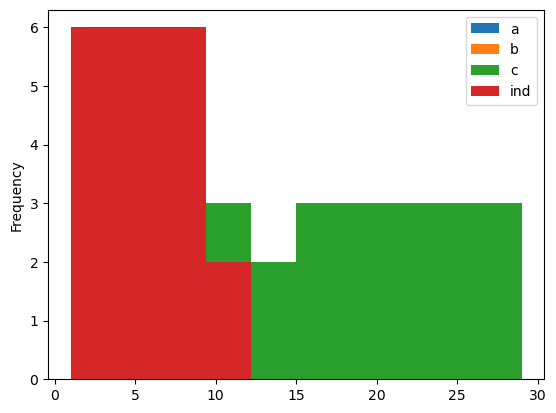

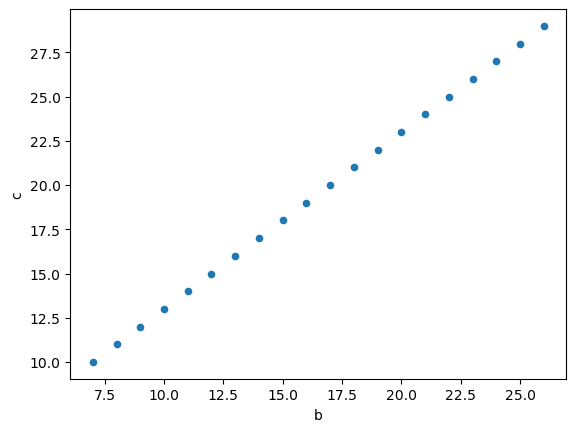

In [24]:
import pandas as pd 

df = pd.DataFrame({
    "a": [4, 5, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    "b": [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    "c": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    "w": ['x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y', 'x', 'y'],
    "col": ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B'],
    "ind": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
}, index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

print(df)


df.plot.hist()
df.plot.scatter(x='b',y='c')
